In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../01_preprocess/preprocessed.csv')

# Display the DataFrame
df.head()


,bin_name,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,...,cycle,instr,L1_miss,LLC_miss,br_miss,task,scale,IPC,CPU,GHz
0,btree-binaries/-DPS_I=2048-DPS_L=2048/hints-n3...,hints,16,1,0,0,0,0,0,0,...,2772.488,1612.730,53.423,28.868,17.676,493.275,4338005.0,0.582,1.0,5.621
1,btree-binaries/-DPS_I=2048-DPS_L=2048/hints-n3...,hints,16,1,0,0,0,0,0,0,...,3034.059,1225.828,42.514,26.413,14.157,539.477,10000000.0,0.404,1.0,5.624
2,btree-binaries/-DPS_I=8192-DPS_L=8192/hints-n3...,hints,16,1,0,0,0,0,0,0,...,2913.514,1596.730,73.864,44.655,17.839,520.400,5070273.0,0.548,1.0,5.599
3,btree-binaries/-DPS_I=8192-DPS_L=8192/hints-n3...,hints,16,1,0,0,0,0,0,0,...,3169.809,1277.088,49.908,31.938,13.833,563.311,10000000.0,0.403,1.0,5.627
4,btree-binaries/-DPS_I=2048-DPS_L=2048/hash-n3-...,hash,16,1,0,0,0,1,0,0,...,2113.503,1892.754,38.734,19.067,17.838,379.241,4456168.0,0.896,1.0,5.573


In [6]:
# Convert 'time' and other fields to numerical if they are not
#df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']
time_correlation

const_basicHintCount              NaN
const_enableBasicHead             NaN
const_enableDense            0.015705
const_enableDense2                NaN
const_enableDensifySplit     0.015705
const_enableHash            -0.047863
const_enableHashAdapt             NaN
const_enableHeadNode              NaN
const_enablePrefix                NaN
const_hashSimdWidth               NaN
const_hashSortUseStdMerge         NaN
const_hashUseCrc32                NaN
const_hashUseSimd                 NaN
const_headNode4HintCount          NaN
const_headNode8HintCount          NaN
const_pageSizeInner         -0.021073
const_pageSizeLeaf          -0.021073
data_size                   -0.051639
data_sorted                       NaN
density                      0.020254
payload_size                      NaN
rand_seed                   -0.013504
ycsb_range_len                    NaN
ycsb_zipf                         NaN
time                         1.000000
nodeCount_Leaf               0.133802
nodeCount_In

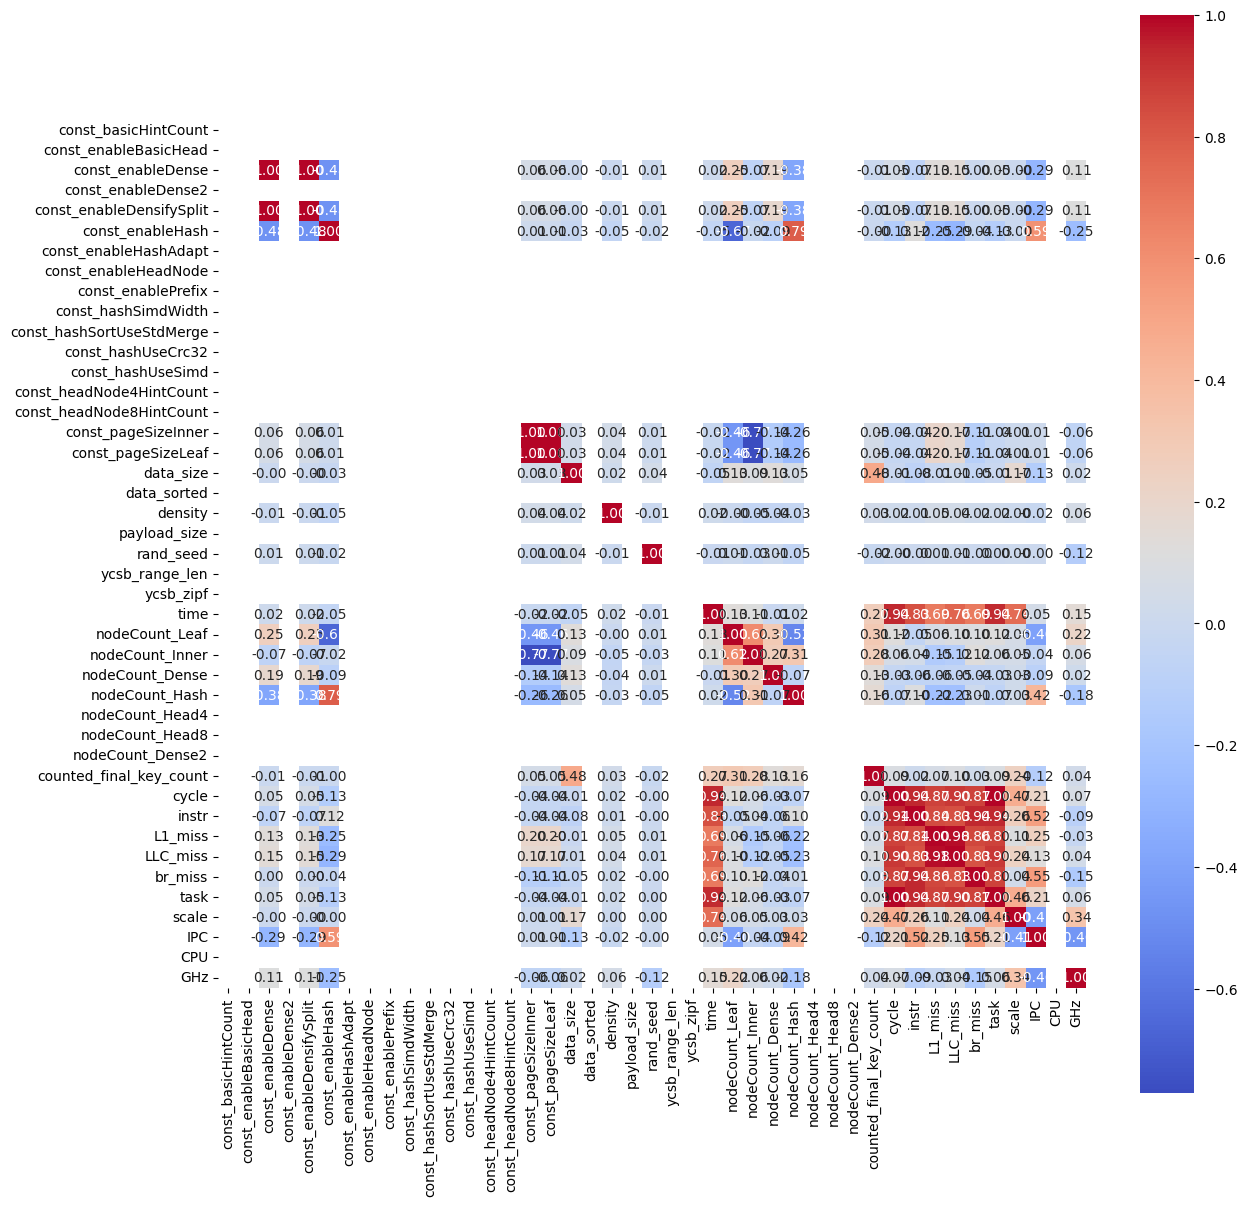

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

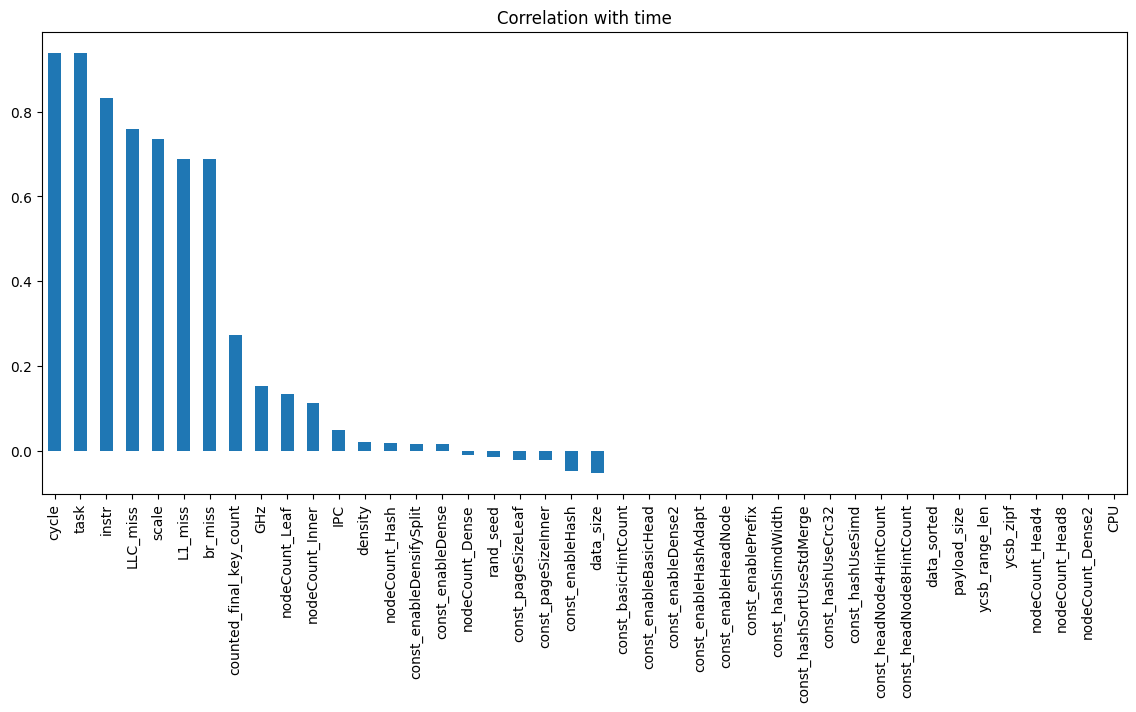

In [10]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))
time_correlation.drop('time').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with time')
plt.show()